# PfDA Assignment 2 2023

## An analysis of paleo-present climate data 

<img src = images/climate_montage.png alt= "Climate change Images" width = "700" height = "auto">

# Table of Contents
1. [Introduction](#overview)  
    - [Problem Statement](#problem-statement)

<a id="overview"></a>

# 1. Introduction and Project Overview: 

This notebook contains my submission for the Programming for Data Analysis Module 2023 module at ATU as part of the Higher Diploma in Computing and Data Analytics.

<a id="problem-statement"></a>
## Problem statement:

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage) 
- Examine Irish context: o Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13) 
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats 
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis). 
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue  
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage) 

Use a Jupyter notebook for your analysis and track your progress using GitHub. 

Use an academic referencing style 

## Background

Paleoclimatology is the study of previous climates that have existed during Earth's different geologic ages.  We can then use data gathered to try to identify the causes of climate changes that have happened in the past in order to better understand our present and future climate.

Paleoclimatology has also helped scientists study and understand how other environmental factors, such as continental drift, solar energy, greenhouses gases in the atmosphere, and the variation in Earth’s orbit have all affected the climate of Earth over time.

The science of paleoclimatology is vital to our understanding of climate on Earth. As scientists become increasingly aware of how climates have been influenced in the past, they can develop models that help predict how increased carbon dioxide levels and other changes might impact the climate of Earth in the future.

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

## Importing Python libraries and modules

In [1]:
# Importing libraries and modules necessary for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import datetime as dt
import math



## CO2 Data

The CO2 data that we're looking at is a composite of atmospheric CO2 records from Antartic ice cores and can be found in this reposoitory as a .xls file [CO2_IPCC](/Data/CO2_IPCC.xls).  The data in this file spans a timeframe of 800k years before present, where present date is 1950.  This version compiled by Bereiter et al. in 2014 replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.

The ice core data is gathered by drilling into ice sheets and extracting ice core samples which are then analysed to identify deposits within the ice, such as pollen and gas.  By drilling down into the ice sheet or glacier and recovering ice from ancient times, scientists are able to determine the past composition and behavior of the atmosphere, what the climate was like when the snow fell, and how the size of ice sheets and glaciers have changed in the past in response to different climate conditions. Ice cores have provided climate and ice dynamics information over many hundred thousand years in very high, sometimes seasonal, resolution.

The information gathered from these ice cores allows paleoclimatologists to better understand atmospheric and climatic conditions that existed when particular layers of the sheet formed and to determine how and why climate changed in the past.


In [2]:
# Read in the CO2 data from IPCC xls file, skipping the first 14 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_IPCC = pd.read_excel('data/CO2_IPCC.xls', sheet_name='CO2 Composite', skiprows=range(14))

In [3]:
co2_IPCC.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [4]:
co2_IPCC.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270113,235.566624,1.340519
std,274261.195468,35.902698,0.924188
min,-51.030000,173.713620,0.010000
25%,14606.209000,204.826743,0.639335
50%,74525.645000,232.456008,1.073871
75%,504177.187879,257.930000,1.800000
max,805668.868405,368.022488,9.960000



https://en.wikipedia.org/wiki/Before_Present

In order to make the data more relateable and easier to compare with the other datasets I will convert the column 'Gasage (yr BP)' to the same year format that is seen in the other datasets.


In [5]:
# Convert the Gasage yr BP format 
years = 1950 - co2_IPCC['Gasage (yr BP)']

In [6]:
# Add a new column to the dataframe with the converted year
co2_IPCC.loc[:, "year"] = (years).astype(int)


In [7]:
print(co2_IPCC.dtypes) 


Gasage (yr BP)           float64
CO2 (ppmv)               float64
sigma mean CO2 (ppmv)    float64
year                       int32
dtype: object


In [8]:
# Read in the CO2 data from Mauna Loa .csv file, skipping the first 43 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_maunaloa = pd.read_csv('data/co2_mauna_loa.csv', skiprows=range(43))

In [9]:
co2_maunaloa.head()

#co2_maunaloa.tail()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In order to analyse the 2 data sets they will need to be merged.

In [22]:
# Change the name of the column in Mauna Loa csv file to match that of IPCC file
# https://stackoverflow.com/questions/46066685/rename-the-column-inside-csv-file
co2_maunaloa = co2_maunaloa.rename(columns=({'mean':'CO2 (ppmv)'}))


In [24]:
# https://pandas.pydata.org/docs/user_guide/merging.html
co2_relevant_columns = co2_maunaloa[['year', 'CO2 (ppmv)']]

co2_merged = pd.concat([co2_relevant_columns, co2_IPCC[['year', 'CO2 (ppmv)']]])

In [25]:
print(co2_merged)

        year  CO2 (ppmv)
0       1959  315.980000
1       1960  316.910000
2       1961  317.640000
3       1962  318.450000
4       1963  318.990000
...      ...         ...
1896 -801975  202.921723
1897 -802059  207.498645
1898 -802572  204.861938
1899 -803182  202.226839
1900 -803718  207.285440

[1965 rows x 2 columns]


In [37]:
# Output the merged IPCC and Mauna Loa data to a .csv file 
co2_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.csv')
co2_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.json')

In [32]:
# Create a dataframe with the merged IPCC and Mauna Loa CO2 data
co2_merged = pd.read_csv("C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.csv")

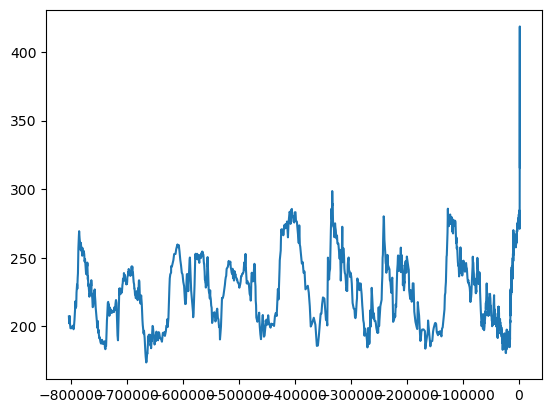

In [31]:
# Check how the merged CO2 data looks
plt.plot(co2_merged['year'],co2_merged['CO2 (ppmv)'])
plt.show()

## Temperature Data

In [35]:
# Read in the CO2 data from IPCC xls file, skipping the first 14 rows. 
temp = pd.read_excel('data/temp_data_Jouzel.xls')
temp = temp.rename(columns=({'EDC3béta':'Age'}))

In [36]:
temp.describe()

,bag,ztop,Age,AICC2012,deutfinal,temp,acc-EDC3beta
count,5819.00000,5819.000000,5819.000000,5819.000000,5804.000000,5819.000000,5819.000000
mean,2910.00000,1599.950000,191800.948469,192715.210134,-417.742884,213.474721,2.044824
std,1679.94494,923.969717,193448.729761,195698.666350,17.949569,3.130075,0.678126
min,1.00000,0.000000,-50.000000,-55.000000,-450.100000,207.900000,1.096556
25%,1455.50000,799.975000,47540.535000,46505.000000,-432.300000,210.900000,1.508500
50%,2910.00000,1599.950000,123446.200000,121574.666700,-421.300000,212.900000,1.838000
75%,4364.50000,2399.925000,276835.550000,277050.500000,-403.200000,216.000000,2.514000
max,5819.00000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


## Resources

https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

https://xlrd.readthedocs.io/en/latest/

https://gml.noaa.gov/ccgg/trends/data.html

https://www.met.ie/climate/available-data/long-term-data-sets/

https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03


## Background Reading

https://www.ipcc.ch/site/assets/uploads/2018/03/srccs_chapter2-1.pdf

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

https://icecores.org/about-ice-cores#:~:text=CO2%20in%20the%20Ice%20Core%20Record&text=Over%20400%2C000%20years%2C%20and%20even,to%20warmer%20in%20interglacial%20periods.